# Threat Search Policy

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from domoku import tools as gt
from domoku.policies.threat_search import ThreatSearchPolicy
from alphazero.gomoku_board import GomokuBoard

In [3]:
import tensorflow as tf
peel = tf.keras.layers.Conv2D(
    filters=1, kernel_size=(3, 3),
    kernel_initializer=tf.constant_initializer([
        [[0., 0., 0.], [0., 1., 0.], [0., 0., 0.]]
    ]),
    bias_initializer=tf.constant_initializer(0.),
    trainable=False)

In [4]:
BOARD_SIZE = 15

In [5]:
threat_model = ThreatSearchPolicy(board_size=BOARD_SIZE)

2022-06-29 19:47:30.039568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [6]:
readable = "C11F9E9G8F7G7G9H8I8H7I6I9F6H6H9I5J4"

### TODO: display don't work for boards with less than 3 stones of the above.

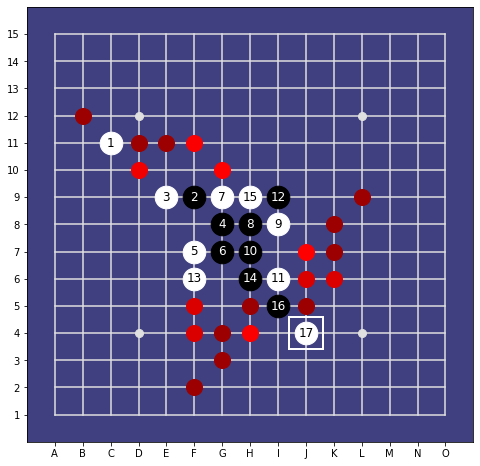

In [7]:
from domoku.board import GomokuBoard as LegacyBoard

stones = gt.string_to_stones(readable)
board_t = LegacyBoard(n=BOARD_SIZE, disp_width=8, stones=stones, heuristics=threat_model)
board_t.display()

# The current threat model

In [8]:
board = GomokuBoard(BOARD_SIZE, readable)
Move = board.Stone
board.print_pi(threat_model)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 479   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 479 479 969   0   0   0   0   0   0   0   0   0]
 [  0   0   0 916   0   0 995   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 479   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 479   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 999 479   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 779 779   0   0   0   0]
 [  0   0   0   0   0 779   0 479   0 479   0   0   0   0   0]
 [  0   0   0   0   0 779 479 969   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 479   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 479   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


---
# The new threat model components

## Primary Detector Layer

In [9]:
from domoku.policies.primary_detector import PrimaryDetector

detector = PrimaryDetector(BOARD_SIZE)

/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [10]:
output = np.squeeze(detector(board.math_rep))
output.shape

(17, 17, 5)

### The projected board

In [11]:
# gt.print_channels(output)

### Threat positions of current and other player

In [12]:
print(output[:, :, 3])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
print(output[:, :, 4])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Forward-Looking Layers
Forward-looking layers treat threat positions as potential stones

In [14]:
from domoku.policies.forward_looking import ForwardLookingLayer

fwll = ForwardLookingLayer(BOARD_SIZE)

In [15]:
output = detector(board.math_rep)
fwd = np.squeeze(fwll(fwll(output)))
# gt.print_channels(fwd )

In [16]:
print((fwd[:, :, 3]*100.).astype(int))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0  91   0 100   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  91   0  91   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91   0 284   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 284   0  91   0   0   0   0]
 [  0   0   0   0   0   0 284 284 384   0 284 284  91   0   0   0   0]
 [  0   0   0   0   0   0  91   0 384   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  91   0 284   0   0   0   0   0   0   0   0   0]
 [  0 

In [17]:
print((fwd[:, :, 4]*100.).astype(int))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 292   0   0  91   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  91   0 284 284 384   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 292  91   0 292   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 284   0   0   0   0]
 [  0   0   0   0   0  91   0   0   0   0   0 284   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 384   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  91   0   0 284 292   0   0   0   0   0]
 [  0   0   0   0   0   0 292   0 284   0 284   0   0   0   0   0   0]
 [  0   0   0   0   0   0 292 284  91  91   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  91   0   0   0  91   0   0   0   0   0   0]
 [  0 

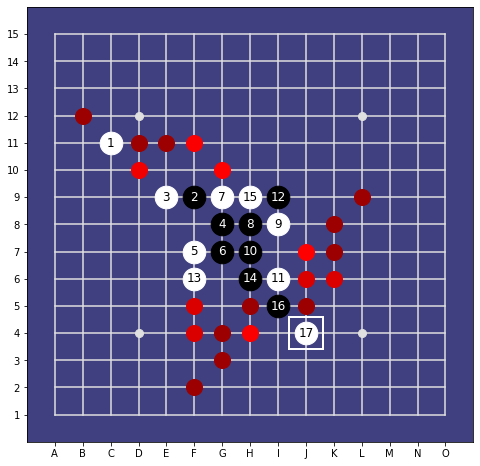

In [18]:
board_t.display()

In [19]:
v_c = np.sum(fwd[:, :, 3], axis=None)
v_o = np.sum(fwd[:, :, 4], axis=None)
v_c, v_o, v_c - v_o

(41.76583, 57.156113, -15.390282)

---

# The new policy and value functions (TODO!!)

In [20]:
logits_c = lambda s: np.squeeze(peel(tf.expand_dims(fwll(detector(s))[:, :, :, 3], -1)))
logits_o = lambda s: np.squeeze(peel(tf.expand_dims(fwll(detector(s))[:, :, :, 4], -1)))
def logits(s):
    return logits_c(s) + logits_o(s)

def v(s):
    return tf.nn.tanh(np.sum(logits_c(s) - logits_o(s), axis=None) / 600.)

In [21]:
board.print_pi(logits, scale=100)
print()
print(v(board.math_rep))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 192   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 192  92 192   0   0   0   0 100   0   0   0   0]
 [  0   0   0 192 100   0 192   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  92   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  92   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 192  92   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 185 192   0   0   0   0]
 [  0   0   0   0   0 285  92 285   0 185  92   0   0   0   0]
 [  0   0   0   0   0 192  92 192   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  92   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  92   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]

tf.Tensor(-0.012613215651775575, shape=(), dtype=floa

In [22]:
board.act('H5')

C11 F9 E9 G8 F7 G7 G9 H8 I8 H7 I6 I9 F6 H6 H9 I5 J4 H5

In [23]:
board.plot()

                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
11    .  .  X  .  .  .  .  .  .  .  .  .  .  .  .    
10    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 9    .  .  .  .  X  O  X  X  O  .  .  .  .  .  .    
 8    .  .  .  .  .  .  O  O  X  .  .  .  .  .  .    
 7    .  .  .  .  .  X  O  O  .  .  .  .  .  .  .    
 6    .  .  .  .  .  X  .  O  X  .  .  .  .  .  .    
 5    .  .  .  .  .  .  . [O] O  .  .  .  .  .  .    
 4    .  .  .  .  .  .  .  .  .  X  .  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


In [24]:
board.print_pi(logits, scale=1)
print()
print(v(board.math_rep))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0   1   0   0   0   0]
 [  0   0   0   1   1   0   1   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   0   0   0]
 [  0   0   0   0   0   3   1   0   0   2   1   0   0   0   0]
 [  0   0   0   0   0   2   0 333   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]

tf.Tensor(-0.5056339695553365, shape=(), dtype=float6

In [25]:
board.act('J5')

C11 F9 E9 G8 F7 G7 G9 H8 I8 H7 I6 I9 F6 H6 H9 I5 J4 H5 J5

In [26]:
board.print_pi(logits, scale=1)
print()
print(v(board.math_rep))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0   0   1   0   0   0   0]
 [  0   0   0   1   1   0   1   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0 999   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]

tf.Tensor(0.926511707164987, shape=(), dtype=float64)